<a href="https://colab.research.google.com/github/Freddyx94/UE/blob/main/predictive_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Installing the required packages

In [3]:
!pip install pandas numpy matplotlib seaborn scikit-learn

# 2. Reading and Loading the data

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#pd.set_option("display.max_columns", None)

# Adjust path if needed
df = pd.read_csv("Books_Data_Kaggle.csv")

df.head()


,index,year,title,author,language,difficulty,rating,ratings_count,genre,gross sales,publisher revenue,price,publisher,units_sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,Penguin Group (USA) LLC,4750


In [5]:
df.info()
df.describe(include="all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              1070 non-null   int64  
 1   year               1069 non-null   float64
 2   title              1047 non-null   object 
 3   author             1070 non-null   object 
 4   language           1017 non-null   object 
 5   difficulty         1070 non-null   object 
 6   rating             1070 non-null   float64
 7   ratings_count      1070 non-null   int64  
 8   genre              1070 non-null   object 
 9   gross sales        1070 non-null   float64
 10  publisher revenue  1070 non-null   float64
 11  price              1070 non-null   float64
 12  publisher          1070 non-null   object 
 13  units_sold         1070 non-null   int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 117.2+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,1070.0,NaN,NaN,NaN,534.5,309.026698,0.0,267.25,534.5,801.75,1069.0
year,1069.0,NaN,NaN,NaN,1971.377923,185.080257,-560.0,1985.0,2003.0,2010.0,2016.0
title,1047,1045,The Awakening,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
author,1070,735,Stephen King,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language,1017,8,eng,737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
difficulty,1070,4,Intermediate,625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1070.0,NaN,NaN,NaN,4.007,0.247244,2.97,3.85,4.015,4.17,4.77
ratings_count,1070.0,NaN,NaN,NaN,94909.913084,31513.242518,27308.0,70398.0,89309.0,113906.5,206792.0
genre,1070,4,genre fiction,822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross sales,1070.0,NaN,NaN,NaN,1856.622944,3936.92424,104.94,372.465,809.745,1487.9575,47795.0


# 3. Basic Cleaning

In [6]:
# Drop rows with missing target
df = df.dropna(subset=["units_sold"])

# Optional: drop rows with missing key predictors
df = df.dropna(subset=["rating", "ratings_count", "price"])

# Remove obviously nonsensical years (if any)
if "year" in df.columns:
    df = df[(df["year"] > 1400) & (df["year"] <= 2025)]

# Quick look after cleaning
df.describe().T


,count,mean,std,min,25%,50%,75%,max
index,1060.0,534.757547,309.562097,0.00,266.7500,534.500,803.2500,1069.00
year,1060.0,1986.333019,48.672107,1593.00,1985.0000,2003.000,2010.0000,2016.00
rating,1060.0,4.007717,0.246707,2.97,3.8500,4.020,4.1700,4.77
ratings_count,1060.0,94954.822642,31535.740348,27308.00,70370.2500,89383.000,113930.5000,206792.00
gross sales,1060.0,1868.165509,3953.143121,104.94,388.0575,815.945,1489.9950,47795.00
publisher revenue,1060.0,848.685425,2267.163471,0.00,0.0000,276.609,726.4440,28677.00
price,1060.0,4.889557,3.563816,0.99,1.9900,3.990,7.0275,33.86
units_sold,1060.0,9629.802830,15314.694534,106.00,553.7500,3924.000,5298.7500,61560.00


# 4. Descriptive Analysis & Plots

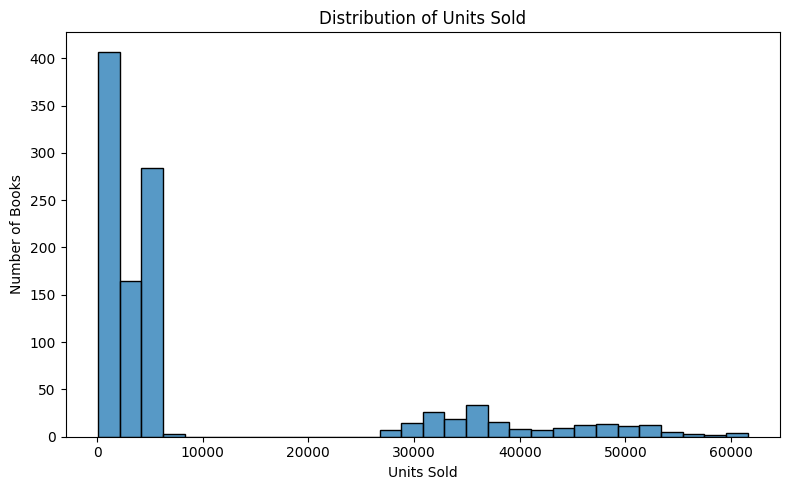

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df["units_sold"], bins=30)
plt.title("Distribution of Units Sold")
plt.xlabel("Units Sold")
plt.ylabel("Number of Books")
plt.tight_layout()
plt.show()


### Rating vs Units sold



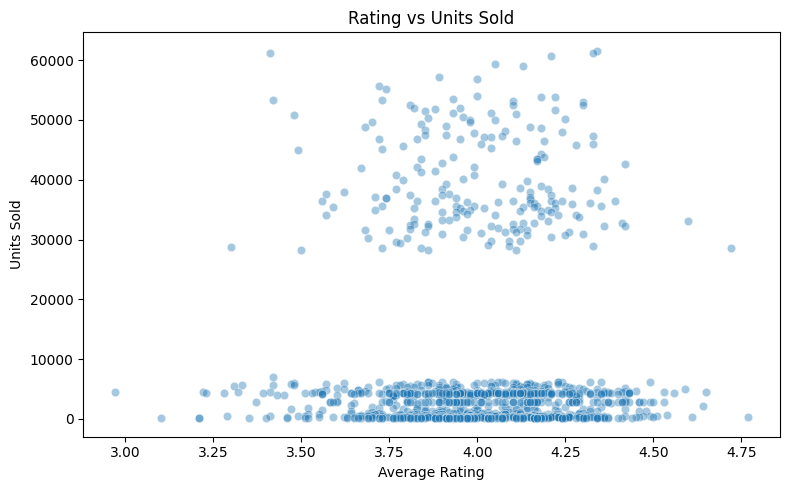

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="rating", y="units_sold", alpha=0.4)
plt.title("Rating vs Units Sold")
plt.xlabel("Average Rating")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()


### Rating count vs Units sold

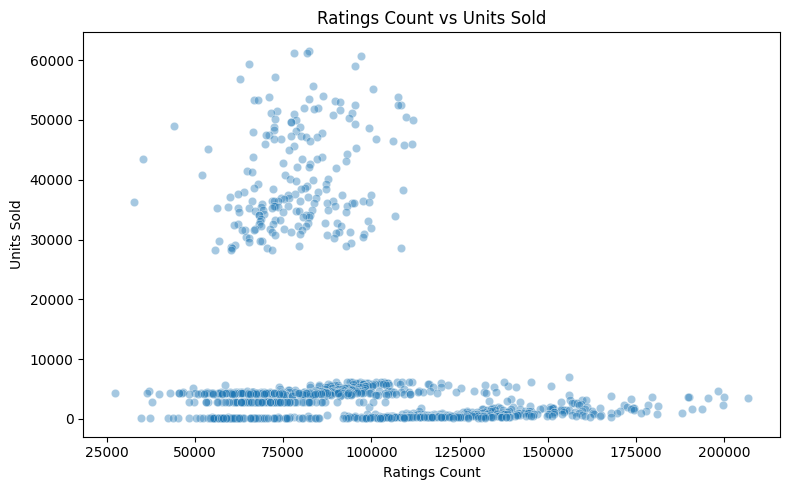

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="ratings_count", y="units_sold", alpha=0.4)
plt.title("Ratings Count vs Units Sold")
plt.xlabel("Ratings Count")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()

### Sales by Genre

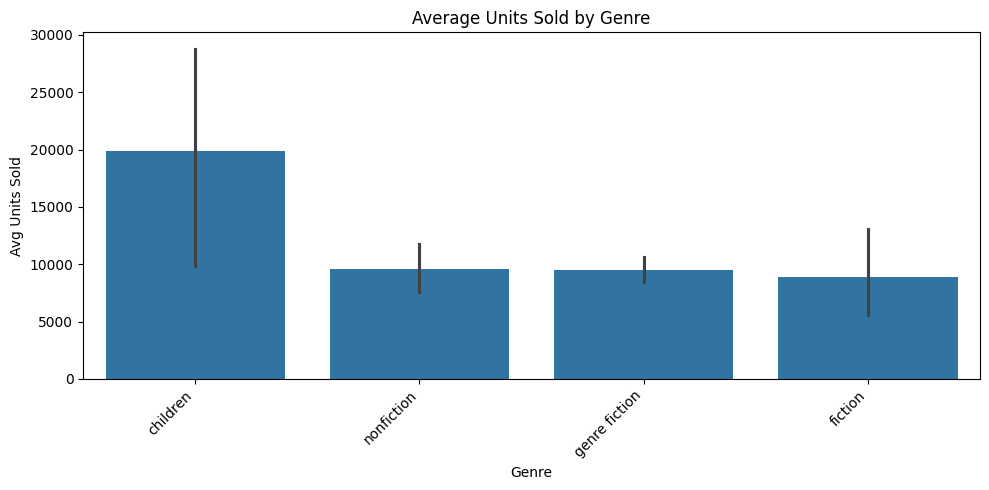

In [10]:
plt.figure(figsize=(10, 5))
genre_order = (
    df.groupby("genre")["units_sold"]
      .mean()
      .sort_values(ascending=False)
      .index
)
sns.barplot(
    data=df,
    x="genre",
    y="units_sold",
    order=genre_order
)
plt.title("Average Units Sold by Genre")
plt.xlabel("Genre")
plt.ylabel("Avg Units Sold")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Sales by difficulty level

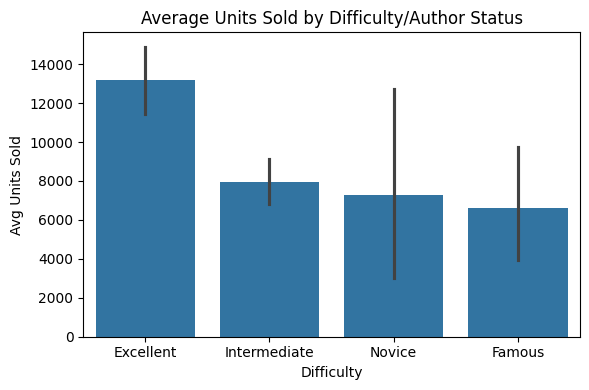

In [11]:
if "difficulty" in df.columns:
    plt.figure(figsize=(6, 4))
    order = df.groupby("difficulty")["units_sold"].mean().sort_values(ascending=False).index
    sns.barplot(data=df, x="difficulty", y="units_sold", order=order)
    plt.title("Average Units Sold by Difficulty/Author Status")
    plt.xlabel("Difficulty")
    plt.ylabel("Avg Units Sold")
    plt.tight_layout()
    plt.show()

# Section 1: Simple Regression: Units sold predicted using Rating counts

In [12]:
X_simple = df[["ratings_count"]]
y = df["units_sold"]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)

linreg_simple = LinearRegression()
linreg_simple.fit(X_train_s, y_train_s)

print("Intercept:", linreg_simple.intercept_)
print("Slope (ratings_count):", linreg_simple.coef_[0])

y_pred_s = linreg_simple.predict(X_test_s)

mae_s = mean_absolute_error(y_test_s, y_pred_s)
rmse_s = np.sqrt(mean_squared_error(y_test_s, y_pred_s))
r2_s = r2_score(y_test_s, y_pred_s)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_s = mape(y_test_s, y_pred_s)

print(f"MAE:  {mae_s:,.2f}")
print(f"RMSE: {rmse_s:,.2f}")




Intercept: 22347.9851021766
Slope (ratings_count): -0.13116869702313078
MAE:  10,455.46
RMSE: 14,161.53


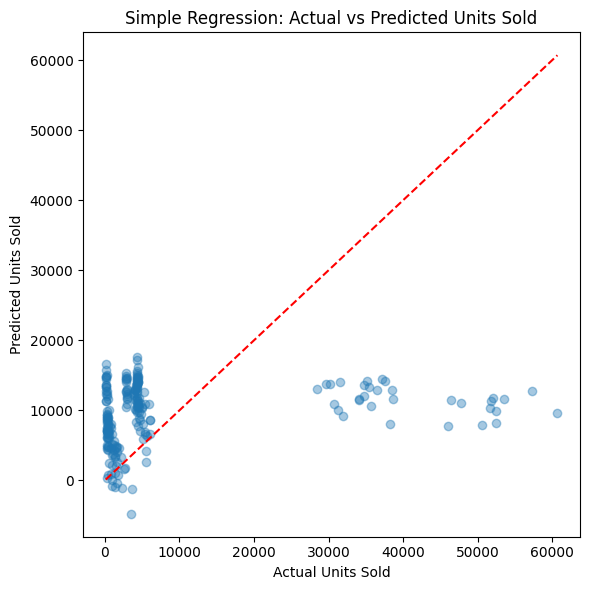

In [13]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test_s, y_pred_s, alpha=0.4)
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Simple Regression: Actual vs Predicted Units Sold")
plt.plot([y_test_s.min(), y_test_s.max()],
         [y_test_s.min(), y_test_s.max()],
         "r--")
plt.tight_layout()
plt.show()


In [14]:
features = ["ratings_count", "rating", "price"]
if "year" in df.columns:
    features.append("year")
if "difficulty" in df.columns:
    features.append("difficulty")
if "genre" in df.columns:
    features.append("genre")
print(features)
df_model = df[features + ["units_sold"]].dropna().copy()

df_dummies = pd.get_dummies(
    df_model,
    columns=[c for c in ["difficulty", "genre"] if c in df_model.columns],
    drop_first=True
)
#print(df_dummies)
X = df_dummies.drop("units_sold", axis=1)
y = df_dummies["units_sold"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape_val = mape(y_test, y_pred)

print(f"MAE:  {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")




['ratings_count', 'rating', 'price', 'year', 'difficulty', 'genre']
MAE:  10,505.09
RMSE: 14,326.23


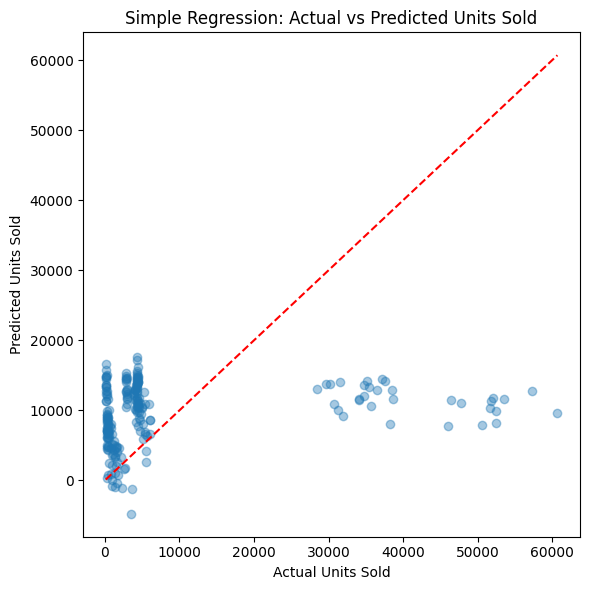

In [15]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test_s, y_pred_s, alpha=0.4)
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Simple Regression: Actual vs Predicted Units Sold")
plt.plot([y_test_s.min(), y_test_s.max()],
         [y_test_s.min(), y_test_s.max()],
         "r--")
plt.tight_layout()
plt.show()

# Section 2: Classification: Predicting best seller

## 2 Classification: Predicting Bestseller Status

We convert the regression problem into a **classification** problem by defining:

- **Bestseller = 1** if a book is in the top 50% of `units_sold`  
- **Non-bestseller = 0** otherwise  

We train a **Logistic Regression** classifier and evaluate it with
accuracy, classification report, and confusion matrix.


In [16]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# --- 1. Prepare target: bestseller (1) vs non-bestseller (0) ---

# Make sure units_sold exists and there are no NaNs
df_clf = df.dropna(subset=["units_sold"]).copy()

# Define threshold as top 25% of units_sold
threshold = df_clf["units_sold"].quantile(0.5)
df_clf["bestseller"] = (df_clf["units_sold"] >= threshold).astype(int)

# --- 2. Build feature matrix X (drop target + obvious identifiers) ---

cols_to_drop = ["units_sold", "bestseller"]

# Drop typical ID / text columns if they exist
id_like_cols = [
    "title", "book_title", "Book_title",
    "author", "book_author", "Book_author",
    "publisher", "isbn", "ISBN", "url"
]

for col in id_like_cols:
    if col in df_clf.columns:
        cols_to_drop.append(col)

X = df_clf.drop(columns=cols_to_drop)
y = df_clf["bestseller"]

# One-hot encode any categorical columns
X = pd.get_dummies(X, drop_first=True)

# --- 3. Train / test split ---

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 4. Train logistic regression classifier ---

#log_clf = LogisticRegression(max_iter=1000)
log_clf = LogisticRegression(max_iter=5000, solver="liblinear")
log_clf.fit(X_train_c, y_train_c)

y_pred_c = log_clf.predict(X_test_c)

# --- 5. Evaluation ---

acc = accuracy_score(y_test_c, y_pred_c)
print(f"Accuracy: {acc:.3f}\n")

print("Classification Report:")
print(classification_report(y_test_c, y_pred_c, digits=3))



Accuracy: 0.623

Classification Report:
              precision    recall  f1-score   support

           0      0.630     0.594     0.612       106
           1      0.616     0.651     0.633       106

    accuracy                          0.623       212
   macro avg      0.623     0.623     0.622       212
weighted avg      0.623     0.623     0.622       212



### Confusion Matrix

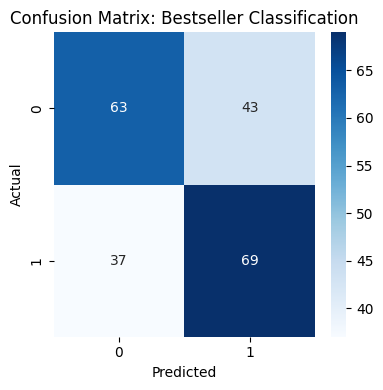

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_c, y_pred_c)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Bestseller Classification")
plt.tight_layout()
plt.show()


# Section 3: Clustering

### Clustering: Two Features

Using features: ['ratings_count', 'units_sold']
Dataset size: (1060, 2)


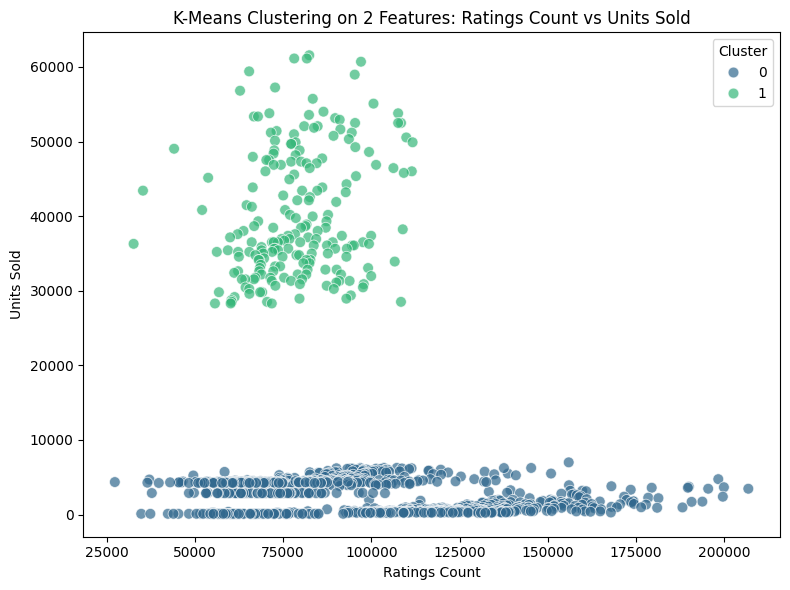


📊 Cluster Means:


,ratings_count,units_sold
cluster,,
0,98657.84,2494.02
1,79129.47,40125.49


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ------------------------------------------
# 1. Select ONLY 2 intuitive features
# ------------------------------------------
two_features = ["ratings_count", "units_sold"]

df_two = df[two_features].dropna().copy()

print("Using features:", two_features)
print("Dataset size:", df_two.shape)

# ------------------------------------------
# 2. Scale the features
#    (important for distance-based clustering)
# ------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_two)

# ------------------------------------------
# 3. Run K-Means with 3 clusters
#    (3 is often easy for visualization)
# ------------------------------------------
kmeans_2d = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_2d = kmeans_2d.fit_predict(X_scaled)

df_two["cluster"] = clusters_2d

# ------------------------------------------
# 4. 2D Visualization (no PCA needed here)
# ------------------------------------------
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df_two,
    x="ratings_count",
    y="units_sold",
    hue="cluster",
    palette="viridis",
    alpha=0.7,
    s=60
)

plt.title("K-Means Clustering on 2 Features: Ratings Count vs Units Sold")
plt.xlabel("Ratings Count")
plt.ylabel("Units Sold")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# ------------------------------------------
# 5. Cluster summary
# ------------------------------------------
print("\n📊 Cluster Means:")
display(df_two.groupby("cluster")[two_features].mean().round(2))


### Clustering: Three Features

Using 1060 books with columns: ['rating', 'ratings_count', 'price', 'units_sold']


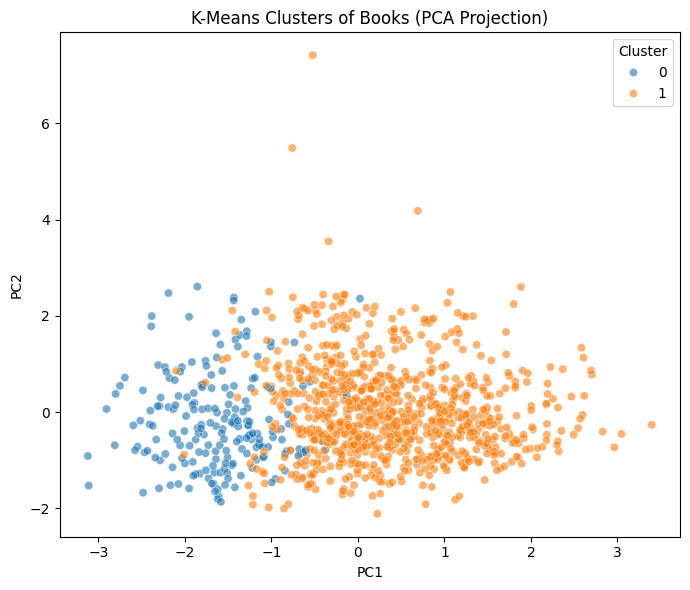


Average feature values per cluster:


,rating,ratings_count,price,units_sold
cluster,,,,
0,4.01,79129.47,4.94,40125.49
1,4.01,98657.84,4.88,2494.02


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# -------------------------
# 1. Select numeric features
# -------------------------

# Adjust this list if some columns don't exist in your df
clust_cols = [c for c in ["rating", "ratings_count", "price", "units_sold"] if c in df.columns]

# Drop rows with missing values in these columns
df_clust = df[clust_cols].dropna().copy()

print(f"Using {len(df_clust)} books with columns: {clust_cols}")

# -------------------------
# 2. Scale features
# -------------------------

scaler = StandardScaler()
X_clust_scaled = scaler.fit_transform(df_clust)

# -------------------------
# 3. Run K-Means clustering
# -------------------------

k = 2  # number of clusters (change if you want)
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_clust_scaled)

df_clust["cluster"] = clusters

# -------------------------
# 4. Visualize clusters with PCA
# -------------------------

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_clust_scaled)

plt.figure(figsize=(7, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df_clust["cluster"],
    palette="tab10",
    alpha=0.6
)
plt.title("K-Means Clusters of Books (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# -------------------------
# 5. Cluster summary (for interpretation)
# -------------------------

cluster_summary = (
    df_clust
    .groupby("cluster")[clust_cols]
    .mean()
    .round(2)
)

print("\nAverage feature values per cluster:")
display(cluster_summary)


### Explore the Scikit-learn library for more models:

https://scikit-learn.org/stable/